# Comparing plasticity rules

## For every model, meta-learn on 8-dimensional halfspace dataset, then transfer rules to a NEW instance, and train / test that on the same dataset type but with fixed rules.

Created by Basile Van Hoorick, Fall 2020.

In [1]:
%run FF_common.ipynb

In [2]:
# IMPORTANT: Henceforth, we use GD directly on inputs but use plasticity rules in the output and hidden layers.
opts_up = Options(gd_input=True,
                  use_graph_rule=True,
                  gd_graph_rule=True,
                  use_output_rule=True,
                  gd_output_rule=True,
                  gd_output=False)
opts_down = Options(gd_input=True,
                    use_graph_rule=True,
                    gd_graph_rule=False,  # Not meta-trainable anymore!
                    use_output_rule=True,
                    gd_output_rule=False,  # Not meta-trainable anymore!
                    gd_output=False)
if 1:
    scheme = UpdateScheme(cross_entropy_loss=True,
                          mse_loss=False,
                          update_misclassified_only=False,
                          update_all_edges=True)
else:
    # Same as paper.
    scheme = UpdateScheme(cross_entropy_loss=True,
                          mse_loss=False,
                          update_misclassified_only=True,
                          update_all_edges=False)

# Feed-forward brain config.
n_up = 8  # Input layer size for meta-learning.
n_down = 8  # Input layer size for desired task training.
m = 2  # Output layer size.
l = 2  # Number of hidden layers.
w = 32  # Width of hidden layers.
p = 0.5  # Connectivity probability.
cap = 16  # Number of nodes firing per layer.

# Training config.
num_runs = 5
num_rule_epochs = 50
num_epochs_upstream = 1
num_epochs_downstream = 1
downstream_backprop = False
dataset_up = 'halfspace'
dataset_down = 'halfspace'

In [3]:
# Instantiate brain factories.
brain_rnn_up_fact = lambda: LocalNet(n_up, m, w, p, cap, 1, options=opts_up, update_scheme=scheme)
brain_rnn_down_fact = lambda: LocalNet(n_down, m, w, p, cap, 1, options=opts_down, update_scheme=scheme)

In [4]:
# Evaluate model.
print('==== Original RNN (very different from all the rest) ====')
stats_rnn_up, stats_rnn_down = evaluate_up_down(
    brain_rnn_up_fact, brain_rnn_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

  0%|          | 0/50 [00:00<?, ?it/s]

==== Original RNN (very different from all the rest) ====

Run 1 / 5...
Meta-learning on halfspace...


100%|██████████| 50/50 [00:52<00:00,  1.05s/it]
../LocalNetBase.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.rnn_rule = torch.tensor(rule).flatten().double()
  5%|▌         | 78/1500 [00:00<00:01, 774.66it/s]

Last loss: 0.3437
Last train accuracy: 0.9873
Last test accuracy: 0.9920
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4953
INITIAL test accuracy: 0.4040
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5440
Last train accuracy: 0.7927
Last test accuracy: 0.7800
Training accuracies:
[0.7387 0.752  0.7367 0.788  0.862  0.8913 0.952  0.9147 0.96   0.9473
 0.938  0.962  0.932  0.938  0.9613 0.9767 0.9427 0.9647 0.9747 0.974
 0.9853 0.966  0.974  0.9753 0.9733 0.974  0.97   0.9713 0.988  0.9833
 0.982  0.988  0.9713 0.9747 0.9787 0.9707 0.976  0.9613 0.9753 0.9747
 0.982  0.98   0.976  0.9733 0.9793 0.98   0.9833 0.986  0.9773 0.9873]


Run 2 / 5...
Meta-learning on halfspace...


  6%|▋         | 95/1500 [00:00<00:01, 949.15it/s]

Last loss: 0.3442
Last train accuracy: 0.9800
Last test accuracy: 0.9680
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.6680
INITIAL test accuracy: 0.6840
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5680
Last train accuracy: 0.7287
Last test accuracy: 0.6860
Training accuracies:
[0.6847 0.8353 0.758  0.8747 0.9187 0.936  0.9453 0.9413 0.948  0.9513
 0.9427 0.966  0.9713 0.9653 0.96   0.9647 0.9627 0.9727 0.9727 0.9627
 0.974  0.9647 0.9833 0.984  0.9787 0.9833 0.9753 0.9833 0.976  0.9853
 0.9807 0.9667 0.986  0.9793 0.9727 0.9767 0.982  0.9793 0.9847 0.9767
 0.9853 0.97   0.982  0.9707 0.976  0.9853 0.9833 0.9753 0.9887 0.98  ]


Run 3 / 5...
Meta-learning on halfspace...


  6%|▋         | 96/1500 [00:00<00:01, 959.04it/s]

Last loss: 0.3414
Last train accuracy: 0.9880
Last test accuracy: 0.9940
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5740
INITIAL test accuracy: 0.5720
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5279
Last train accuracy: 0.7973
Last test accuracy: 0.7920
Training accuracies:
[0.802  0.7867 0.8547 0.8227 0.8813 0.866  0.934  0.936  0.95   0.9413
 0.9193 0.9647 0.9567 0.9533 0.9773 0.9727 0.938  0.9633 0.9707 0.9787
 0.9673 0.966  0.9747 0.968  0.9793 0.9827 0.98   0.9833 0.9833 0.9767
 0.9793 0.9807 0.99   0.988  0.9887 0.982  0.978  0.9747 0.968  0.9793
 0.9847 0.986  0.988  0.9667 0.9867 0.976  0.9853 0.986  0.9887 0.988 ]


Run 4 / 5...
Meta-learning on halfspace...


  7%|▋         | 99/1500 [00:00<00:01, 986.11it/s]

Last loss: 0.3440
Last train accuracy: 0.9773
Last test accuracy: 0.9660
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5080
INITIAL test accuracy: 0.4900
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5310
Last train accuracy: 0.7900
Last test accuracy: 0.8060
Training accuracies:
[0.7213 0.7287 0.7693 0.8093 0.836  0.928  0.928  0.9573 0.9433 0.9473
 0.9607 0.9627 0.9647 0.962  0.9693 0.9773 0.9793 0.974  0.9427 0.972
 0.9613 0.9733 0.9713 0.98   0.9767 0.9753 0.9833 0.9767 0.9647 0.9733
 0.9813 0.986  0.9873 0.9827 0.9833 0.972  0.9793 0.9833 0.984  0.9707
 0.9873 0.9793 0.9753 0.9827 0.9853 0.9847 0.9687 0.988  0.978  0.9773]


Run 5 / 5...
Meta-learning on halfspace...


  7%|▋         | 102/1500 [00:00<00:01, 1016.84it/s]

Last loss: 0.3437
Last train accuracy: 0.9800
Last test accuracy: 0.9800
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5360
INITIAL test accuracy: 0.5200
Epoch 1 / 1 ...


100%|██████████| 1500/1500 [00:01<00:00, 964.82it/s] 


Last loss: 0.5633
Last train accuracy: 0.7380
Last test accuracy: 0.7440
Training accuracies:
[0.6227 0.7187 0.6867 0.6953 0.736  0.8007 0.8953 0.9207 0.9513 0.9573
 0.9687 0.9713 0.966  0.98   0.98   0.9733 0.9613 0.9867 0.9813 0.9853
 0.9807 0.9673 0.9733 0.9793 0.9753 0.974  0.9673 0.966  0.9673 0.9807
 0.978  0.988  0.9773 0.9753 0.9693 0.974  0.9807 0.974  0.982  0.9727
 0.984  0.9747 0.9713 0.9667 0.9787 0.9833 0.9787 0.97   0.978  0.98  ]



Saving figure to: figs/comparing_transfer_rnn_halfspace


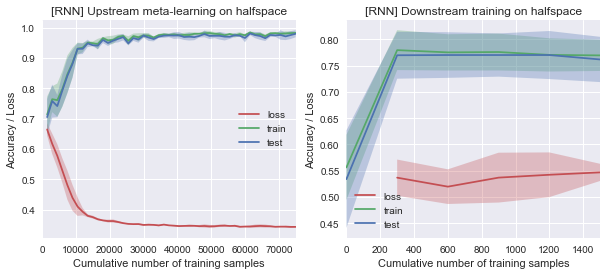

Mean essential stats across all runs:
Last upstream loss: 0.3434
Last upstream train accuracy: 0.9825
Last upstream test accuracy: 0.9800
Last downstream loss: 0.5468
Last downstream train accuracy: 0.7693
Last downstream test accuracy: 0.7616



In [5]:
# Plot aggregated stats.
agg_stats_rnn_up = convert_multi_stats_uncertainty(stats_rnn_up)
agg_stats_rnn_down = convert_multi_stats_uncertainty(stats_rnn_down)
plot_curves(agg_stats_rnn_up, agg_stats_rnn_down,
            '[RNN] Upstream meta-learning on ' + dataset_up,
            '[RNN] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_rnn_' + dataset_up)

## Evaluate all table-based feed-forward networks.

In [6]:
# Instantiate brain factories.
brain_prepost_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePost() if opts_up.use_graph_rule else None,
    output_rule=TableRule_PrePost() if opts_up.use_output_rule else None, options=opts_up, update_scheme=scheme)
brain_prepost_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePost() if opts_down.use_graph_rule else None,
    output_rule=TableRule_PrePost() if opts_down.use_output_rule else None, options=opts_down, update_scheme=scheme)
brain_prepostcount_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePostCount() if opts_up.use_graph_rule else None,
    output_rule=TableRule_PrePostCount() if opts_up.use_output_rule else None, options=opts_up, update_scheme=scheme)
brain_prepostcount_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePostCount() if opts_down.use_graph_rule else None,
    output_rule=TableRule_PrePostCount() if opts_down.use_output_rule else None, options=opts_down, update_scheme=scheme)
brain_prepostpercent_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent() if opts_up.use_graph_rule else None,
    output_rule=TableRule_PrePostPercent() if opts_up.use_output_rule else None, options=opts_up, update_scheme=scheme)
brain_prepostpercent_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent() if opts_down.use_graph_rule else None,
    output_rule=TableRule_PrePostPercent() if opts_down.use_output_rule else None, options=opts_down, update_scheme=scheme)
brain_postcount_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PostCount() if opts_up.use_graph_rule else None,
    output_rule=TableRule_PostCount() if opts_up.use_output_rule else None, options=opts_up, update_scheme=scheme)
brain_postcount_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PostCount() if opts_down.use_graph_rule else None,
    output_rule=TableRule_PostCount() if opts_down.use_output_rule else None, options=opts_down, update_scheme=scheme)

In [7]:
# Evaluate models.
print('==== Interpretation: Pre and Post ====')
stats_prepost_up, stats_prepost_down = evaluate_up_down(
    brain_prepost_up_fact, brain_prepost_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Incoming Count ====')
stats_prepostcount_up, stats_prepostcount_down = evaluate_up_down(
    brain_prepostcount_up_fact, brain_prepostcount_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Binned Incoming Fraction ====')
stats_prepostpercent_up, stats_prepostpercent_down = evaluate_up_down(
    brain_prepostpercent_up_fact, brain_prepostpercent_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Post and Incoming Count ====')
stats_postcount_up, stats_postcount_down = evaluate_up_down(
    brain_postcount_up_fact, brain_postcount_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream,
    min_upstream_acc=0.4)

  0%|          | 0/50 [00:00<?, ?it/s]

==== Interpretation: Pre and Post ====

Run 1 / 5...
Meta-learning on halfspace...


  8%|▊         | 115/1500 [00:00<00:01, 1142.43it/s]

Last loss: 0.3460
Last train accuracy: 0.9833
Last test accuracy: 0.9600
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5000
INITIAL test accuracy: 0.4860
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5423
Last train accuracy: 0.7247
Last test accuracy: 0.7580
Training accuracies:
[0.734  0.7027 0.7107 0.74   0.7267 0.816  0.7993 0.8367 0.878  0.8827
 0.8907 0.9153 0.9047 0.9073 0.9293 0.942  0.952  0.9507 0.934  0.954
 0.9547 0.9587 0.9693 0.962  0.9667 0.964  0.9693 0.962  0.9707 0.9587
 0.9527 0.974  0.9707 0.966  0.9713 0.9613 0.9667 0.9787 0.9587 0.9647
 0.9747 0.9727 0.9727 0.9747 0.978  0.9753 0.97   0.98   0.9667 0.9833]


Run 2 / 5...
Meta-learning on halfspace...


  8%|▊         | 126/1500 [00:00<00:01, 1256.11it/s]

Last loss: 0.3536
Last train accuracy: 0.9533
Last test accuracy: 0.9640
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4927
INITIAL test accuracy: 0.4900
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6233
Last train accuracy: 0.7513
Last test accuracy: 0.7400
Training accuracies:
[0.5487 0.6187 0.6633 0.656  0.6873 0.8007 0.8467 0.8813 0.9033 0.9247
 0.9233 0.9347 0.9447 0.94   0.9487 0.9453 0.954  0.9593 0.9533 0.9527
 0.95   0.956  0.9553 0.956  0.958  0.962  0.96   0.9607 0.9647 0.9667
 0.9693 0.9653 0.9627 0.9693 0.9647 0.9607 0.956  0.962  0.972  0.97
 0.9747 0.9667 0.958  0.9567 0.9647 0.98   0.9633 0.974  0.972  0.9533]


Run 3 / 5...
Meta-learning on halfspace...


  6%|▌         | 93/1500 [00:00<00:01, 927.02it/s]

Last loss: 0.3574
Last train accuracy: 0.9627
Last test accuracy: 0.9440
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4907
INITIAL test accuracy: 0.4880
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5833
Last train accuracy: 0.7867
Last test accuracy: 0.8120
Training accuracies:
[0.722  0.7833 0.744  0.7453 0.7827 0.8227 0.7887 0.8413 0.844  0.8913
 0.8913 0.9207 0.91   0.9413 0.9413 0.9373 0.9487 0.9473 0.942  0.964
 0.9593 0.9627 0.9587 0.964  0.946  0.962  0.95   0.968  0.9613 0.9647
 0.958  0.9733 0.966  0.9653 0.95   0.9613 0.9633 0.9607 0.9533 0.9547
 0.9733 0.9647 0.9707 0.9327 0.9653 0.97   0.9647 0.956  0.956  0.9627]


Run 4 / 5...
Meta-learning on halfspace...


  8%|▊         | 125/1500 [00:00<00:01, 1246.17it/s]

Last loss: 0.3414
Last train accuracy: 0.9800
Last test accuracy: 0.9460
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4960
INITIAL test accuracy: 0.5060
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5099
Last train accuracy: 0.8013
Last test accuracy: 0.7860
Training accuracies:
[0.7    0.672  0.7187 0.796  0.7947 0.8513 0.8387 0.908  0.9127 0.934
 0.932  0.9407 0.9293 0.9433 0.9633 0.938  0.9627 0.9673 0.9647 0.968
 0.9707 0.9713 0.978  0.968  0.9727 0.9767 0.9773 0.9793 0.9767 0.974
 0.9733 0.9693 0.974  0.9747 0.9733 0.9567 0.964  0.982  0.966  0.9807
 0.974  0.982  0.9767 0.9867 0.976  0.9787 0.9767 0.9807 0.9713 0.98  ]


Run 5 / 5...
Meta-learning on halfspace...


  8%|▊         | 123/1500 [00:00<00:01, 1226.55it/s]

Last loss: 0.3553
Last train accuracy: 0.9693
Last test accuracy: 0.9400
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4880
INITIAL test accuracy: 0.5040
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5933
Last train accuracy: 0.7453
Last test accuracy: 0.7780
Training accuracies:
[0.7793 0.7873 0.7687 0.8527 0.8593 0.8293 0.8507 0.884  0.88   0.8813
 0.9213 0.8953 0.9267 0.8867 0.9213 0.9347 0.9453 0.95   0.962  0.9447
 0.9613 0.9553 0.9653 0.9627 0.9633 0.9627 0.966  0.9653 0.9673 0.9713
 0.9733 0.976  0.9587 0.9533 0.9673 0.9693 0.9733 0.97   0.9733 0.9527
 0.974  0.9673 0.9733 0.9533 0.9667 0.96   0.9673 0.97   0.9613 0.9693]

==== Interpretation: Pre and Post and Incoming Count ====

Run 1 / 5...
Meta-learning on halfspace...


  8%|▊         | 115/1500 [00:00<00:01, 1146.26it/s]

Last loss: 0.3634
Last train accuracy: 0.9660
Last test accuracy: 0.9520
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5100
INITIAL test accuracy: 0.5260
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5799
Last train accuracy: 0.7653
Last test accuracy: 0.7160
Training accuracies:
[0.7547 0.7353 0.7613 0.798  0.8307 0.8487 0.8467 0.9033 0.9153 0.906
 0.9207 0.9407 0.9373 0.942  0.9553 0.9533 0.9393 0.962  0.9567 0.9587
 0.962  0.9573 0.96   0.9573 0.9507 0.9427 0.9607 0.9647 0.9473 0.96
 0.954  0.972  0.9653 0.9653 0.9627 0.9713 0.9633 0.956  0.9553 0.964
 0.95   0.9653 0.9707 0.9727 0.9627 0.946  0.962  0.9713 0.9707 0.966 ]


Run 2 / 5...
Meta-learning on halfspace...


  8%|▊         | 121/1500 [00:00<00:01, 1204.62it/s]

Last loss: 0.3716
Last train accuracy: 0.9433
Last test accuracy: 0.9220
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4873
INITIAL test accuracy: 0.4860
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6378
Last train accuracy: 0.6987
Last test accuracy: 0.7140
Training accuracies:
[0.76   0.756  0.7833 0.77   0.8087 0.868  0.8867 0.908  0.9153 0.8773
 0.9373 0.95   0.942  0.944  0.9387 0.9427 0.95   0.958  0.966  0.9393
 0.9667 0.9673 0.9647 0.958  0.968  0.9307 0.9693 0.9667 0.8933 0.946
 0.9313 0.9513 0.9727 0.9667 0.9667 0.96   0.956  0.944  0.97   0.95
 0.966  0.956  0.9553 0.958  0.9687 0.962  0.9547 0.9347 0.93   0.9433]


Run 3 / 5...
Meta-learning on halfspace...


  8%|▊         | 121/1500 [00:00<00:01, 1209.15it/s]

Last loss: 0.3681
Last train accuracy: 0.9640
Last test accuracy: 0.9580
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5113
INITIAL test accuracy: 0.4940
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6033
Last train accuracy: 0.7240
Last test accuracy: 0.7240
Training accuracies:
[0.5107 0.7513 0.7307 0.7313 0.7093 0.7653 0.864  0.894  0.9047 0.8907
 0.9173 0.932  0.936  0.938  0.9433 0.958  0.9533 0.958  0.952  0.9633
 0.9373 0.9687 0.9533 0.976  0.96   0.9533 0.9707 0.9613 0.9707 0.9687
 0.968  0.9407 0.9673 0.9727 0.9667 0.9507 0.974  0.972  0.9647 0.9787
 0.964  0.952  0.974  0.9667 0.982  0.962  0.974  0.952  0.968  0.964 ]


Run 4 / 5...
Meta-learning on halfspace...


  8%|▊         | 114/1500 [00:00<00:01, 1137.24it/s]

Last loss: 0.3647
Last train accuracy: 0.9713
Last test accuracy: 0.9600
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4833
INITIAL test accuracy: 0.5100
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5784
Last train accuracy: 0.7493
Last test accuracy: 0.7660
Training accuracies:
[0.7447 0.6913 0.6233 0.794  0.882  0.8787 0.8953 0.9373 0.9313 0.922
 0.9233 0.946  0.928  0.9267 0.9313 0.942  0.9607 0.968  0.9527 0.956
 0.9593 0.9587 0.9307 0.9727 0.948  0.9687 0.976  0.9747 0.968  0.968
 0.942  0.946  0.976  0.9747 0.9827 0.974  0.9707 0.9733 0.9573 0.972
 0.9667 0.976  0.9673 0.972  0.9727 0.954  0.982  0.9687 0.9607 0.9713]


Run 5 / 5...
Meta-learning on halfspace...


  8%|▊         | 115/1500 [00:00<00:01, 1143.26it/s]

Last loss: 0.3690
Last train accuracy: 0.9593
Last test accuracy: 0.9780
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4940
INITIAL test accuracy: 0.4920
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6082
Last train accuracy: 0.7207
Last test accuracy: 0.7320
Training accuracies:
[0.672  0.726  0.6933 0.792  0.8507 0.882  0.8907 0.9147 0.884  0.9413
 0.9293 0.9293 0.9487 0.9373 0.958  0.9533 0.9653 0.9647 0.952  0.9587
 0.9607 0.97   0.9587 0.9647 0.9493 0.9627 0.96   0.9653 0.9607 0.9587
 0.9367 0.958  0.9693 0.968  0.9653 0.9687 0.97   0.966  0.9713 0.9673
 0.972  0.9647 0.9693 0.954  0.9587 0.9627 0.9673 0.9693 0.9687 0.9593]

==== Interpretation: Pre and Post and Binned Incoming Fraction ====

Run 1 / 5...
Meta-learning on halfspace...


  6%|▌         | 93/1500 [00:00<00:01, 921.63it/s]

Last loss: 0.3717
Last train accuracy: 0.9540
Last test accuracy: 0.9540
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4973
INITIAL test accuracy: 0.5320
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.4633
Last train accuracy: 0.8400
Last test accuracy: 0.8560
Training accuracies:
[0.724  0.7127 0.7027 0.7613 0.6753 0.8093 0.8247 0.812  0.856  0.828
 0.8907 0.9033 0.892  0.9    0.894  0.9    0.8947 0.9227 0.9113 0.9493
 0.9207 0.9353 0.9247 0.9533 0.93   0.9387 0.9453 0.9493 0.9433 0.9533
 0.9247 0.9573 0.95   0.9587 0.9527 0.9593 0.954  0.952  0.954  0.9593
 0.95   0.96   0.9653 0.9553 0.9527 0.9633 0.9533 0.9587 0.9553 0.954 ]


Run 2 / 5...
Meta-learning on halfspace...


  7%|▋         | 108/1500 [00:00<00:01, 1078.80it/s]

Last loss: 0.3622
Last train accuracy: 0.9687
Last test accuracy: 0.9480
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5073
INITIAL test accuracy: 0.4920
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5295
Last train accuracy: 0.7373
Last test accuracy: 0.7400
Training accuracies:
[0.8293 0.808  0.8367 0.84   0.7833 0.842  0.8567 0.8833 0.8993 0.904
 0.9367 0.944  0.9453 0.9553 0.9687 0.9493 0.9673 0.958  0.9633 0.9693
 0.9453 0.9747 0.9267 0.9707 0.9627 0.972  0.9667 0.972  0.9733 0.97
 0.9733 0.956  0.9773 0.9633 0.9727 0.9593 0.9747 0.97   0.9753 0.96
 0.924  0.9733 0.974  0.9527 0.9633 0.9733 0.97   0.9667 0.9793 0.9687]


Run 3 / 5...
Meta-learning on halfspace...


  8%|▊         | 117/1500 [00:00<00:01, 1168.13it/s]

Last loss: 0.3633
Last train accuracy: 0.9653
Last test accuracy: 0.9340
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5133
INITIAL test accuracy: 0.4940
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5262
Last train accuracy: 0.7733
Last test accuracy: 0.7740
Training accuracies:
[0.6987 0.706  0.742  0.744  0.726  0.79   0.842  0.8627 0.8347 0.8827
 0.894  0.9187 0.896  0.9253 0.94   0.9273 0.9307 0.9473 0.9567 0.9647
 0.958  0.9547 0.9707 0.948  0.968  0.9487 0.9633 0.9727 0.954  0.9593
 0.9567 0.97   0.978  0.97   0.9627 0.966  0.9633 0.9627 0.9647 0.972
 0.9633 0.9687 0.964  0.9767 0.9587 0.97   0.97   0.9727 0.98   0.9653]


Run 4 / 5...
Meta-learning on halfspace...


  8%|▊         | 113/1500 [00:00<00:01, 1126.95it/s]

Last loss: 0.3526
Last train accuracy: 0.9840
Last test accuracy: 0.9740
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5040
INITIAL test accuracy: 0.5160
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5332
Last train accuracy: 0.7627
Last test accuracy: 0.7620
Training accuracies:
[0.7093 0.7593 0.736  0.8433 0.8993 0.9133 0.912  0.926  0.938  0.954
 0.9553 0.9513 0.956  0.956  0.9373 0.9813 0.984  0.982  0.9767 0.9753
 0.9647 0.9553 0.9707 0.9747 0.98   0.984  0.9807 0.9813 0.9687 0.9787
 0.982  0.9773 0.9867 0.9747 0.9687 0.9727 0.9827 0.9853 0.974  0.976
 0.98   0.9833 0.9833 0.9813 0.9913 0.9867 0.9853 0.9827 0.9753 0.984 ]


Run 5 / 5...
Meta-learning on halfspace...


  8%|▊         | 113/1500 [00:00<00:01, 1121.12it/s]

Last loss: 0.3599
Last train accuracy: 0.9727
Last test accuracy: 0.9560
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4987
INITIAL test accuracy: 0.4820
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6230
Last train accuracy: 0.6933
Last test accuracy: 0.6940
Training accuracies:
[0.6847 0.694  0.6907 0.712  0.7633 0.7587 0.798  0.824  0.8467 0.8947
 0.916  0.918  0.9473 0.9127 0.93   0.9427 0.9547 0.9493 0.9347 0.9513
 0.964  0.964  0.9713 0.948  0.9713 0.9573 0.97   0.948  0.9547 0.968
 0.97   0.9673 0.956  0.964  0.972  0.976  0.948  0.954  0.948  0.962
 0.9653 0.9713 0.9707 0.9767 0.974  0.976  0.9733 0.97   0.9753 0.9727]

==== Interpretation: Post and Incoming Count ====

Run 1 / 5...
Meta-learning on halfspace...


  8%|▊         | 125/1500 [00:00<00:01, 1243.50it/s]

Last loss: 0.6351
Last train accuracy: 0.5100
Last test accuracy: 0.4860
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5400
INITIAL test accuracy: 0.5100
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7666
Last train accuracy: 0.5400
Last test accuracy: 0.5100
Training accuracies:
[0.49   0.49   0.51   0.49   0.51   0.49   0.49   0.51   0.51   0.49
 0.51   0.51   0.49   0.51   0.49   0.51   0.49   0.49   0.51   0.51
 0.51   0.4873 0.51   0.51   0.51   0.4833 0.51   0.51   0.51   0.51
 0.51   0.51   0.51   0.51   0.51   0.51   0.474  0.4713 0.51   0.4827
 0.4773 0.4667 0.51   0.51   0.4807 0.51   0.51   0.51   0.474  0.51  ]


Run 2 / 5...
Meta-learning on halfspace...


  8%|▊         | 123/1500 [00:00<00:01, 1227.56it/s]

Last loss: 0.6931
Last train accuracy: 0.5060
Last test accuracy: 0.5040
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5033
INITIAL test accuracy: 0.4940
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.5033
Last test accuracy: 0.4940
Training accuracies:
[0.494 0.506 0.494 0.506 0.494 0.494 0.494 0.506 0.506 0.494 0.494 0.494
 0.506 0.506 0.494 0.506 0.494 0.506 0.506 0.506 0.506 0.506 0.494 0.506
 0.494 0.506 0.506 0.494 0.494 0.506 0.494 0.506 0.494 0.494 0.506 0.494
 0.494 0.494 0.506 0.494 0.494 0.506 0.494 0.494 0.506 0.506 0.494 0.506
 0.494 0.506]


Run 3 / 5...
Meta-learning on halfspace...


  8%|▊         | 124/1500 [00:00<00:01, 1234.71it/s]

Last loss: 0.6931
Last train accuracy: 0.5000
Last test accuracy: 0.5500
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5080
INITIAL test accuracy: 0.5100
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.5080
Last test accuracy: 0.5100
Training accuracies:
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


Run 4 / 5...
Meta-learning on halfspace...


  9%|▊         | 129/1500 [00:00<00:01, 1282.11it/s]

Last loss: 0.6603
Last train accuracy: 0.5240
Last test accuracy: 0.4740
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4947
INITIAL test accuracy: 0.4960
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7966
Last train accuracy: 0.5053
Last test accuracy: 0.5040
Training accuracies:
[0.5093 0.4907 0.4907 0.5093 0.5093 0.4907 0.4907 0.5093 0.5093 0.4907
 0.4907 0.4907 0.5093 0.5093 0.5093 0.4907 0.4907 0.5093 0.4907 0.5093
 0.4907 0.5093 0.4907 0.51   0.5113 0.5127 0.516  0.514  0.5153 0.51
 0.4907 0.4907 0.4907 0.4907 0.5113 0.5273 0.5133 0.4907 0.5213 0.5127
 0.516  0.5093 0.5127 0.51   0.4907 0.5107 0.5107 0.4907 0.4907 0.524 ]


Run 5 / 5...
Meta-learning on halfspace...


  8%|▊         | 120/1500 [00:00<00:01, 1198.11it/s]

Last loss: 0.6117
Last train accuracy: 0.4647
Last test accuracy: 0.5020
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5027
INITIAL test accuracy: 0.5000
Epoch 1 / 1 ...


100%|██████████| 1500/1500 [00:01<00:00, 1165.11it/s]


Last loss: 0.8151
Last train accuracy: 0.5027
Last test accuracy: 0.5000
Training accuracies:
[0.4647 0.5353 0.5353 0.5353 0.5353 0.4647 0.4647 0.5353 0.5353 0.5353
 0.5353 0.4647 0.5353 0.4647 0.5353 0.5353 0.538  0.5353 0.5353 0.542
 0.5467 0.546  0.5353 0.54   0.5353 0.538  0.5447 0.5353 0.5393 0.5473
 0.4647 0.4647 0.5387 0.5367 0.5433 0.5353 0.536  0.4647 0.5353 0.54
 0.5467 0.54   0.4647 0.5353 0.594  0.4647 0.5467 0.5447 0.54   0.4647]



Saving figure to: figs/comparing_transfer_prepost_halfspace


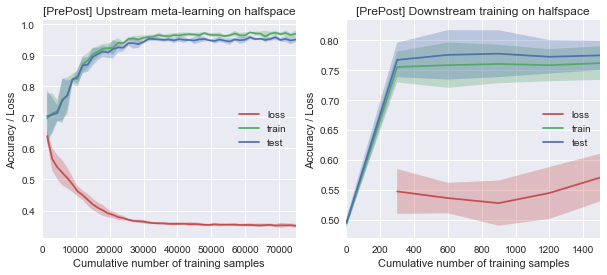

Mean essential stats across all runs:
Last upstream loss: 0.3507
Last upstream train accuracy: 0.9697
Last upstream test accuracy: 0.9508
Last downstream loss: 0.5704
Last downstream train accuracy: 0.7619
Last downstream test accuracy: 0.7748

Saving figure to: figs/comparing_transfer_prepostcount_halfspace


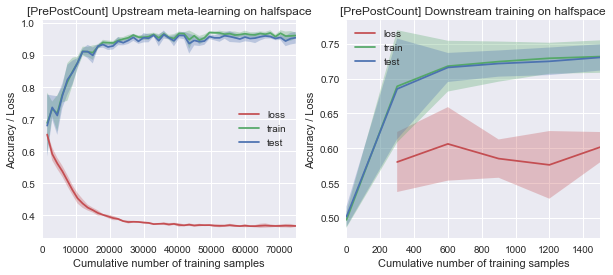

Mean essential stats across all runs:
Last upstream loss: 0.3674
Last upstream train accuracy: 0.9608
Last upstream test accuracy: 0.9540
Last downstream loss: 0.6015
Last downstream train accuracy: 0.7316
Last downstream test accuracy: 0.7304

Saving figure to: figs/comparing_transfer_prepostpercent_halfspace


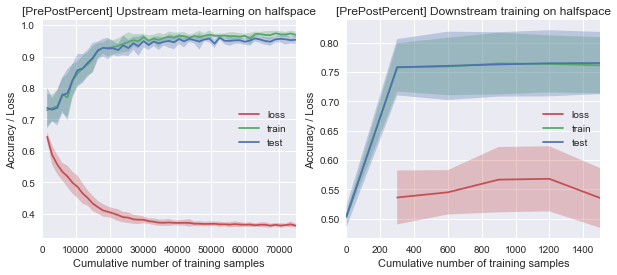

Mean essential stats across all runs:
Last upstream loss: 0.3619
Last upstream train accuracy: 0.9689
Last upstream test accuracy: 0.9532
Last downstream loss: 0.5350
Last downstream train accuracy: 0.7613
Last downstream test accuracy: 0.7652

Saving figure to: figs/comparing_transfer_postcount_halfspace


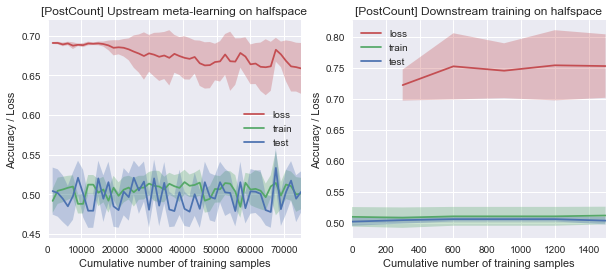

Mean essential stats across all runs:
Last upstream loss: 0.6587
Last upstream train accuracy: 0.5009
Last upstream test accuracy: 0.5032
Last downstream loss: 0.7529
Last downstream train accuracy: 0.5119
Last downstream test accuracy: 0.5036



In [8]:
# Plot aggregated stats.
agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
plot_curves(agg_stats_prepost_up, agg_stats_prepost_down,
            '[PrePost] Upstream meta-learning on ' + dataset_up,
            '[PrePost] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_prepost_' + dataset_up)
agg_stats_prepostcount_up = convert_multi_stats_uncertainty(stats_prepostcount_up)
agg_stats_prepostcount_down = convert_multi_stats_uncertainty(stats_prepostcount_down)
plot_curves(agg_stats_prepostcount_up, agg_stats_prepostcount_down,
            '[PrePostCount] Upstream meta-learning on ' + dataset_up,
            '[PrePostCount] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_prepostcount_' + dataset_up)
agg_stats_prepostpercent_up = convert_multi_stats_uncertainty(stats_prepostpercent_up)
agg_stats_prepostpercent_down = convert_multi_stats_uncertainty(stats_prepostpercent_down)
plot_curves(agg_stats_prepostpercent_up, agg_stats_prepostpercent_down,
            '[PrePostPercent] Upstream meta-learning on ' + dataset_up,
            '[PrePostPercent] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_prepostpercent_' + dataset_up)
agg_stats_postcount_up = convert_multi_stats_uncertainty(stats_postcount_up)
agg_stats_postcount_down = convert_multi_stats_uncertainty(stats_postcount_down)
plot_curves(agg_stats_postcount_up, agg_stats_postcount_down,
            '[PostCount] Upstream meta-learning on ' + dataset_up,
            '[PostCount] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_postcount_' + dataset_up)

Saving figure to: figs/comparing_transfer_table_halfspace


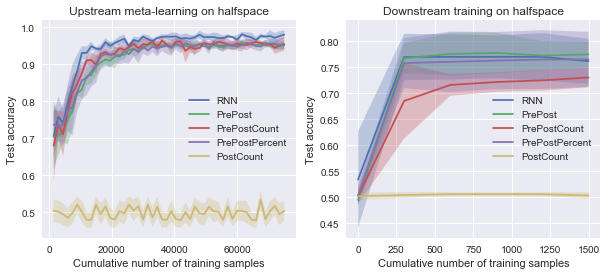

In [9]:
# Plot to compare all.
all_stats_up = [agg_stats_rnn_up, agg_stats_prepost_up, agg_stats_prepostcount_up, agg_stats_prepostpercent_up, agg_stats_postcount_up]
all_stats_down = [agg_stats_rnn_down, agg_stats_prepost_down, agg_stats_prepostcount_down, agg_stats_prepostpercent_down, agg_stats_postcount_down]
labels = ['RNN', 'PrePost', 'PrePostCount', 'PrePostPercent', 'PostCount']
plot_compare_models(all_stats_up, all_stats_down, labels,
                    'Upstream meta-learning on ' + dataset_up,
                    'Downstream training on ' + dataset_down,
                    'figs/comparing_transfer_table_' + dataset_up)

In [10]:
if 0:
    agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
    agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
    for i in range(len(stats_prepost_up)):
        plot_curves(stats_prepost_up[i], stats_prepost_down[i],
                    '[PrePost] Upstream meta-learning on ' + dataset_up,
                    '[PrePost] Downstream training on ' + dataset_down)